<a href="https://colab.research.google.com/github/0204hyoj/Scikit-learn-/blob/main/irisRoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pylab as pl
from sklearn import svm, datasets
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc

In [ ]:
random_state = np.random.RandomState(0)

In [ ]:
# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
# Make it a binary classification problem by removing the third class
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

In [ ]:
# Add noisy features to make the problem harder
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [ ]:
# shuffle and split training and test sets
X, y = shuffle(X, y, random_state=random_state)
half = int(n_samples / 2)
X_train, X_test = X[:half], X[half:]
y_train, y_test = y[:half], y[half:]

In [ ]:
# Run classifier
classifier = svm.SVC(kernel='linear', probability=True)
probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)

In [ ]:
#Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" %roc_auc)

Area under the ROC curve : 0.797907


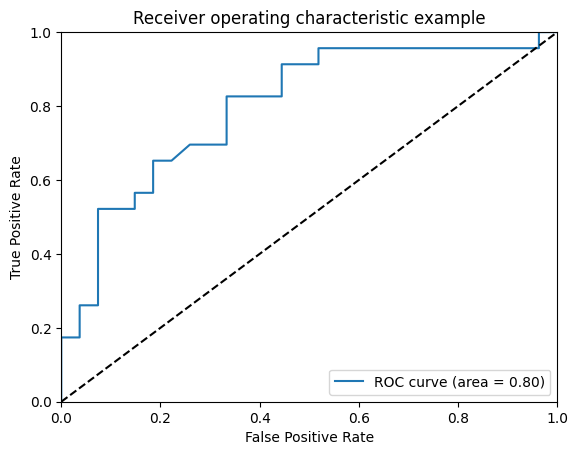

In [ ]:
# Plot ROC curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()